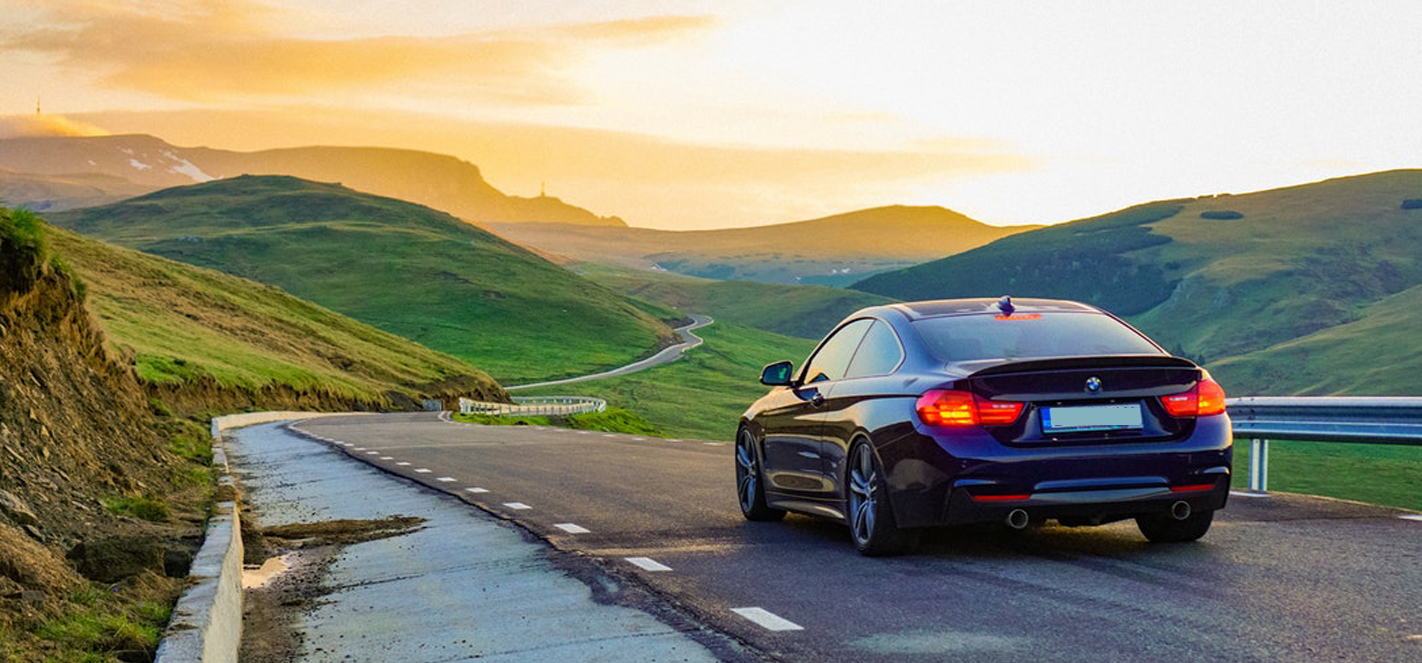


## Business Problem
_______________________________________________________________________________________________________________________________

Used Car Lot TM is a newly established local business in the United States.

They have advised that they are seeking to understand what are the top make and model of cars that sold the most in the last year nationally. From this analysis we intend on building a multiple linear regression model to predict what brand names will make the list.

The car lot intends on using this information to ensure their buisness objectives, marketing, and sales teams' concentrations are on point.

In addition, the information obtained will also be used to educate their staff and sales team. When approached by consumers looking to buy a used car, facts and statistics may assist all those involved. 


In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Import data set
df = pd.read_csv('data\\USA_cars_datasets.csv')

In [3]:
#inspect shape
df.shape

(2499, 13)

In [4]:
print(list(df.columns))

['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition']


In [5]:
df.corr()

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


In [6]:
#drop unnecessary column data
df.drop(['Unnamed: 0', 'vin', 'lot', 'country', 'condition'], axis=1, inplace=True)

In [7]:
df.head()

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida


In [8]:
from collections import Counter
def return_counter(data_frame, column_name, limit):
  print(dict(Counter(data_frame[column_name]
  .values).most_common(limit)))

In [9]:
return_counter(df, 'brand', 5)

{'ford': 1235, 'dodge': 432, 'nissan': 312, 'chevrolet': 297, 'gmc': 42}


In [10]:
#create the column data
continuous = ['price', 'mileage', 'year']
categoricals = ['brand', 'model', 'title_status', 'color','state']
df_cont = df[continuous]

In [11]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [12]:
stats = return_statistics(df, 'brand', 'price')
print(stats.head(15))

            brand    mean price  std in price
19          lexus  33220.000000  31650.099526
1            land  28900.000000  12003.610568
25  mercedes-benz  28704.000000  21468.481911
18            bmw  26397.058824  18204.851865
15       cadillac  24941.000000  12733.425933
12           ford  21666.888259  12945.547175
23          buick  19715.769231   9349.780712
9       chevrolet  18669.952862  12195.882280
0         lincoln  18150.000000  25667.976157
24          dodge  17781.988426   9415.887822
5            audi  13981.250000  17543.367396
11       chrysler  13686.111111  10045.160608
3        infiniti  13098.333333   2792.827936
22         nissan  12065.820513   6088.236961
4             kia  11123.846154   6792.132138


In [13]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,price,year,mileage
count,2499,2499,2499
mean,"18,767.67","2,016.71","52,298.69"
std,"12,116.09",3.44,"59,705.52"
min,0,1973,0
25%,10200,2016,"21,466.50"
50%,16900,2018,35365
75%,"25,555.50",2019,"63,472.50"
max,84900,2020,1017936


In [14]:
df.fillna(-99999, inplace=True)

In [15]:
print(dict(Counter(df['brand']).most_common(5)))

{'ford': 1235, 'dodge': 432, 'nissan': 312, 'chevrolet': 297, 'gmc': 42}


In [16]:
df_d1 = df[df['color'] =='black']
print(set(df_d1['brand']))

{'lincoln', 'land', 'infiniti', 'kia', 'audi', 'acura', 'chevrolet', 'jeep', 'chrysler', 'ford', 'gmc', 'cadillac', 'harley-davidson', 'honda', 'bmw', 'lexus', 'maserati', 'nissan', 'buick', 'dodge', 'mercedes-benz', 'jaguar', 'toyota'}


In [17]:
print(dict(Counter(df['state']).most_common(5)))

{'pennsylvania': 299, 'florida': 246, 'texas': 214, 'california': 190, 'michigan': 169}


In [18]:
print(dict(Counter(df_d1['brand']).most_common(5)))

{'ford': 262, 'nissan': 84, 'dodge': 69, 'chevrolet': 54, 'gmc': 14}


In [19]:
import matplotlib.pyplot as plt
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = df[df[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
    plt.show()

['ford', 'dodge', 'nissan', 'chevrolet', 'gmc']


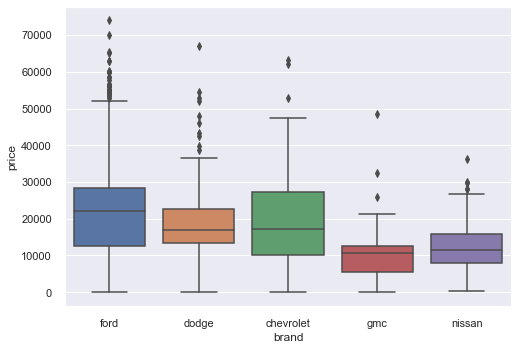

In [20]:
get_boxplot_of_categories(df, 'brand', 'price', 5)

In [21]:
#review null values 
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64

In [22]:
#checking to see if there are unique values 
df.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
dtype: int64

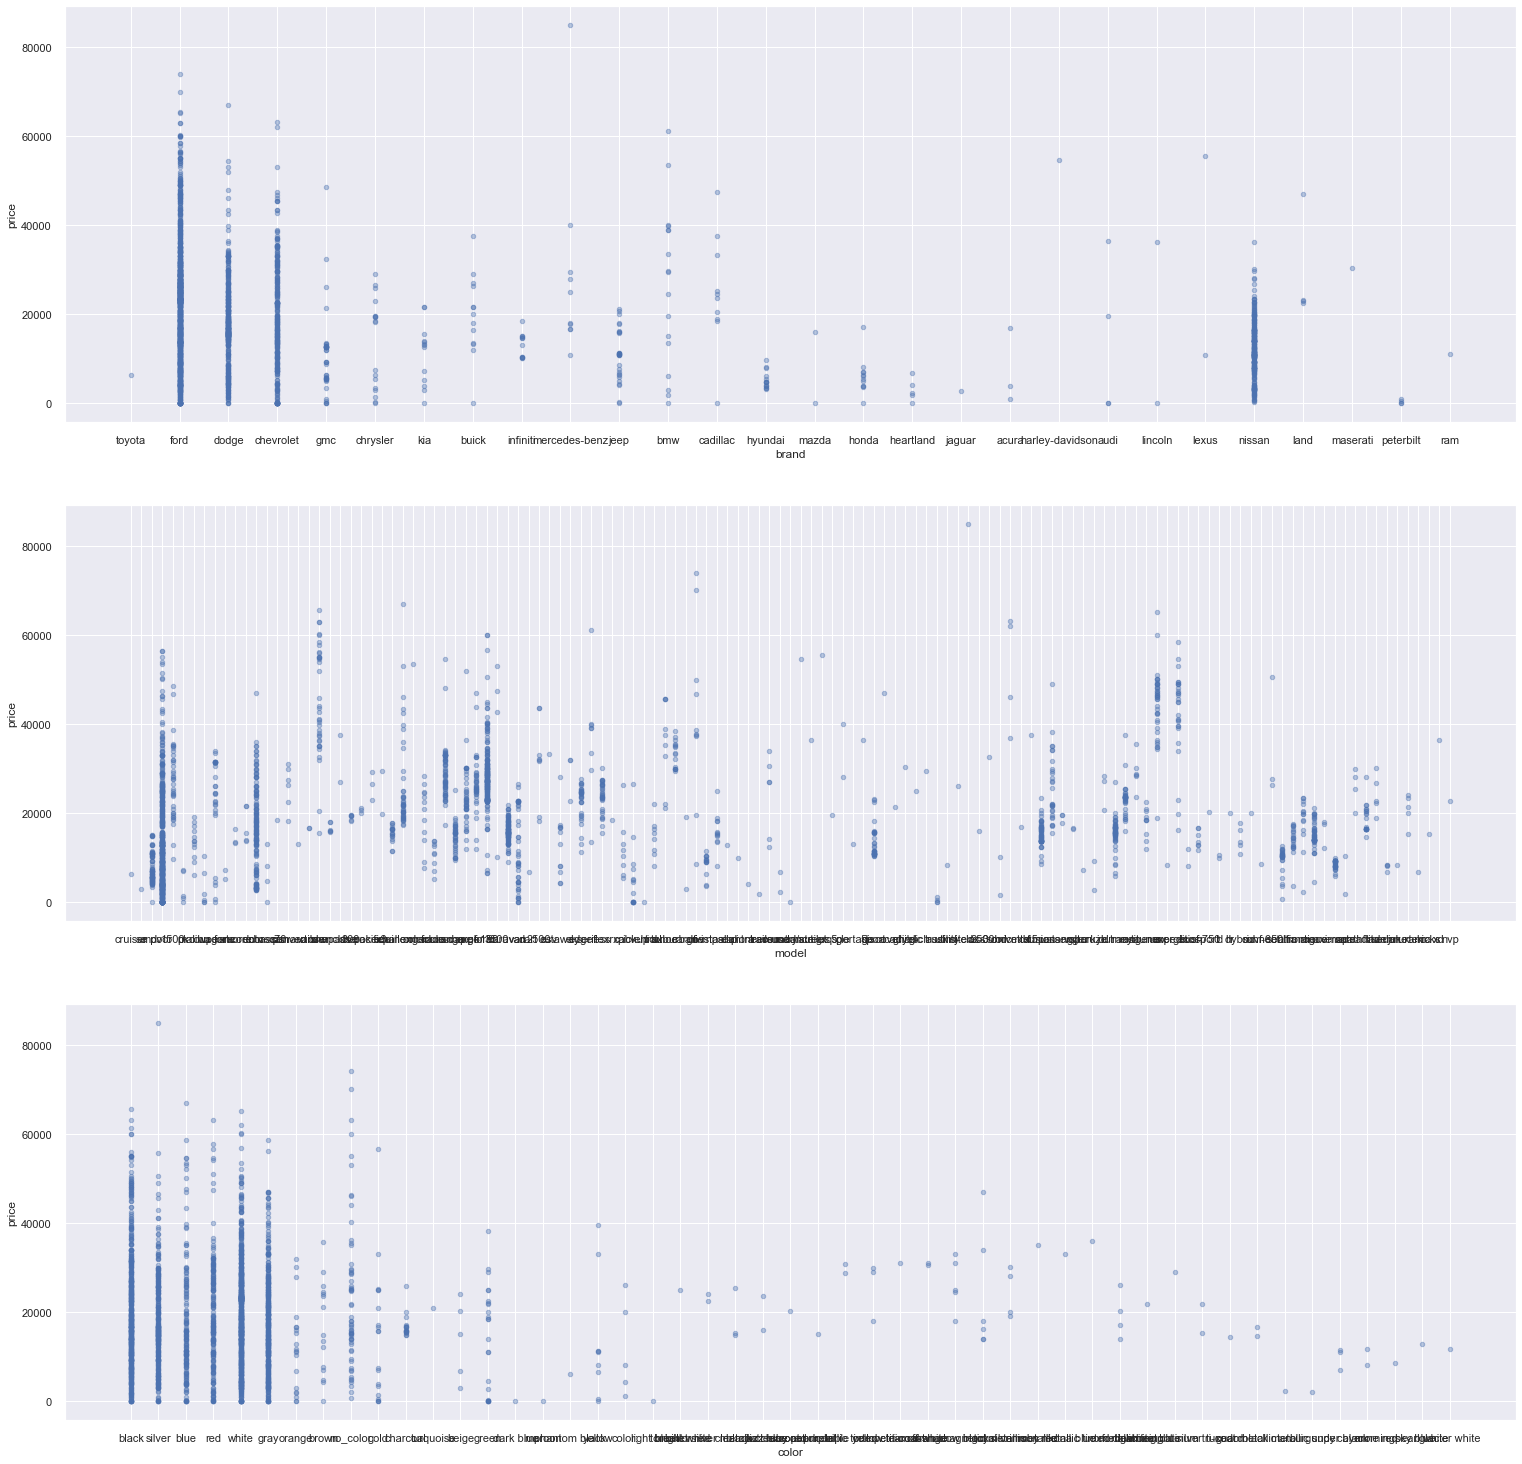

In [23]:
#Continuous data visualisations
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(26,26))

for xcol, ax in zip(['brand', 'model', 'color'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

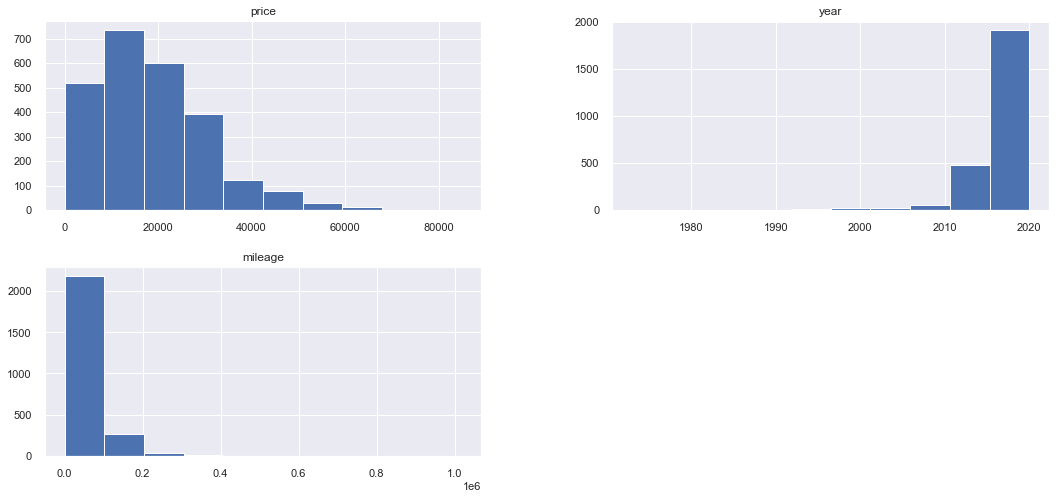

In [24]:
#Useful histogram to view any variances and understand the data set
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
df.hist(ax = ax);

In [25]:
# log features declared with lamda values to convert int to floats 
log_names = [f'{column}_log' for column in df_cont.columns]
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df_log = np.log(df_cont)
df_log.columns = log_names

In [26]:
# normalize continued features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [27]:
#creating duimmy data
pd.get_dummies(df)

,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,state_south carolina,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming
0,6300,2008,274117,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5350,2018,39590,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,27700,2018,6654,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,9200,2018,34553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,9200,2018,31594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,9200,2018,32557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#declaring categorical dummy data 
df_ohe = pd.get_dummies(df[categoricals], drop_first=True)

In [29]:
#combining two variables

preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
preprocessed.head()

,price_log,mileage_log,year_log,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,state_south carolina,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming
0,NaN,NaN,-2.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,-1.66,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NaN,NaN,0.37,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,-0.79,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,NaN,NaN,0.37,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# one hot encode (ohe)categoricals
df_ohe = pd.get_dummies(df[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
X = preprocessed.drop('year_log', axis=1)
y = preprocessed['year_log']

In [31]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
# A brief preview of train-test split to create test training data and dummy data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

1999 500 1999 500


In [33]:
#apply model to the train set 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#apply model to the train set 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)


In [ ]:
#Continuous data visualisations
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'sqft_living', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')